In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [4]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

C:\Users\yangw\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Early stopping

In [7]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5, restore_best_weights=True)


In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[early_stopping])


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7181 - loss: 1.0513 - val_accuracy: 0.9126 - val_loss: 0.3091
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9112 - loss: 0.3157 - val_accuracy: 0.9330 - val_loss: 0.2451
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9285 - loss: 0.2478 - val_accuracy: 0.9388 - val_loss: 0.2100
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9398 - loss: 0.2137 - val_accuracy: 0.9488 - val_loss: 0.1843
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9453 - loss: 0.1876 - val_accuracy: 0.9536 - val_loss: 0.1669
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9543 - loss: 0.1632 - val_accuracy: 0.9600 - val_loss: 0.1484
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9589 - loss: 0.1458 - val_accuracy: 0.9618 - val_loss: 0.1370
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9620 - loss: 0.1319 - 

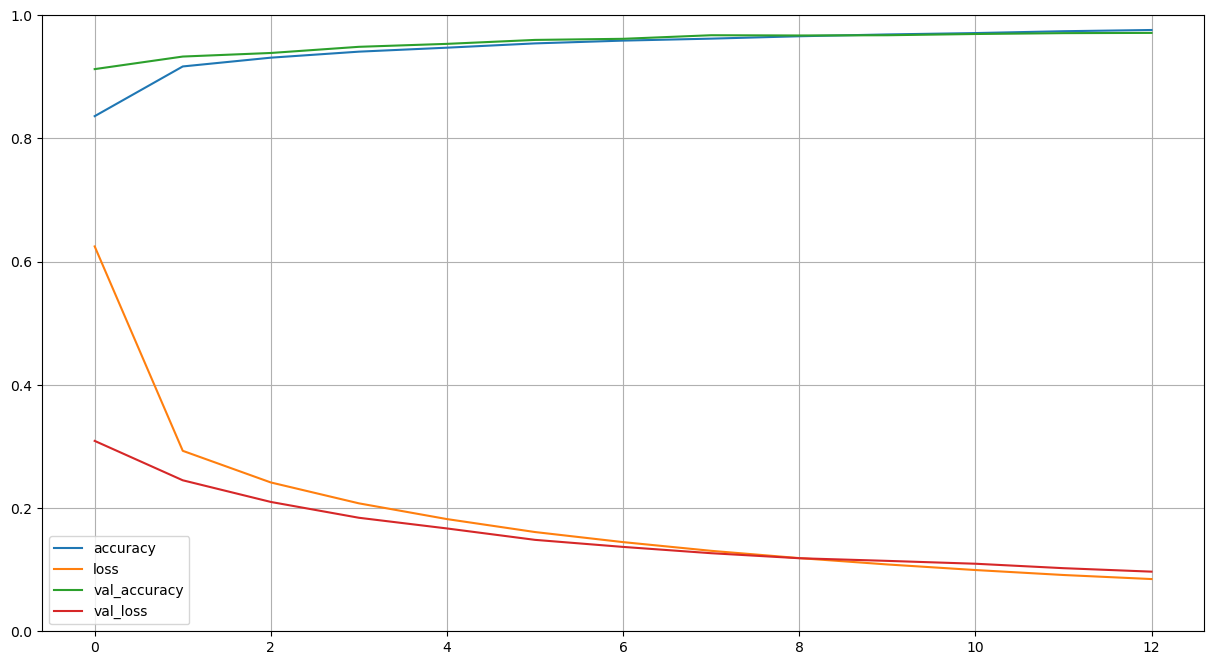

In [9]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()